# ASL Recognition Model - Vision & Language F20
### Layne Berry, Ethan Blaser, Thrishna Sonnakul, Surya Ambardar
---

# I - IMAGE CLASSIFIER

# Imports

In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np
import random
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import os

ModuleNotFoundError: No module named 'google'

# Data

In [ ]:
# Access ASL Images from Google Drive
drive.mount('/content/gdrive', force_remount=True)

In [ ]:
train_data = pd.read_csv('gdrive/My Drive/ASL/sign_mnist_train.csv')
test_data = pd.read_csv('gdrive/My Drive/ASL/sign_mnist_test.csv')
print(train_data.shape) #27455 images, each with 785 features: one label at index 0 followed by 784 pixel features (28x28 image)
print(test_data.shape) #7172 images, each with 785 features: one label at index 0 and followed by 784 pixel features (28x28 image) 

(27455, 785)
(7172, 785)


In [ ]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

#Splitting & reshaping test and train into x and y
trainy = np.array(train_data['label']).reshape(27455, 1)
trainx = np.array(train_data.drop(columns='label')).reshape(27455, 28, 28, 1)

testy = np.array(test_data['label']).reshape(7172, 1)
testx = np.array(test_data.drop(columns='label')).reshape(7172, 28, 28, 1)

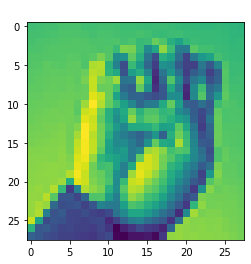

In [ ]:
#See a random training image and its label
random_index = random.randint(1,27455)
image = trainx[random_index].reshape(28,28)
label = trainy[random_index][0]
plt.title(class_names[label], color='white')
plt.imshow(image)

# Model Training

In [ ]:
#Defining the Convolutional Neural Network
def get_cnn():
  cnn = Sequential()
  cnn.add(Conv2D(32, (3, 3), input_shape = (28,28, 1), activation='relu'))
  cnn.add(MaxPooling2D(pool_size = (2, 2)))
  cnn.add(Dropout(0.25))

  cnn.add(Conv2D(128, (3, 3), input_shape = (28,28, 1), activation='relu'))
  cnn.add(MaxPooling2D(pool_size = (2, 2)))
  cnn.add(Dropout(0.25))

  cnn.add(Flatten())
  cnn.add(Dense(units = 512, activation = 'relu'))
  cnn.add(Dense(units = 25, activation = 'softmax'))
  cnn.summary()
  return cnn

In [ ]:
#Compiling
asl_model = get_cnn()
asl_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = asl_model.fit(trainx, trainy, batch_size = 128, epochs = 20, verbose = 1, validation_data = (testx, testy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

In [ ]:
asl_model.save('finger_spelling_classifier.h5')

# Predictions

In [ ]:
asl_model = keras.models.load_model("finger_spelling_classifier.h5")

In [ ]:
#Predictions for the test data
predicted_classes = asl_model.predict_classes(testx)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
#print out the frequency of each letter it got wrong

#make the dictionary
mistake_dict = {}
for letter in class_names:
  mistake_dict[letter] = 0

index = 0

for row in predicted_classes:
    #go through each prediction and sum up how many of each was wrong

    predicted_let = str(class_names[int(predicted_classes[index])])
    
    actual_let = str(class_names[int(testy[index][0])])
    if predicted_let != actual_let:
      mistake_dict[actual_let]+=1
    index+=1

for key, val in mistake_dict.items():
  print('Model mispredicted ' + key + ' ' + str(val) + ' times')

  

Model mispredicted A 0 times
Model mispredicted B 0 times
Model mispredicted C 0 times
Model mispredicted D 0 times
Model mispredicted E 1 times
Model mispredicted F 0 times
Model mispredicted G 41 times
Model mispredicted H 41 times
Model mispredicted I 0 times
Model mispredicted J 0 times
Model mispredicted K 21 times
Model mispredicted L 0 times
Model mispredicted M 42 times
Model mispredicted N 42 times
Model mispredicted O 42 times
Model mispredicted P 21 times
Model mispredicted Q 0 times
Model mispredicted R 79 times
Model mispredicted S 0 times
Model mispredicted T 62 times
Model mispredicted U 31 times
Model mispredicted V 0 times
Model mispredicted W 21 times
Model mispredicted X 18 times
Model mispredicted Y 20 times


Confused U with R
46


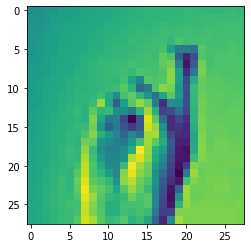

In [ ]:
other_index = 0
for row in predicted_classes:
    #go through each prediction and sum up how many of each was wrong
    predicted_let = str(class_names[int(predicted_classes[other_index])])
    actual_let = str(class_names[int(testy[other_index][0])])
    if (predicted_let != actual_let) and (predicted_let == 'U'):
      print('Confused U with ' + actual_let)
      print(other_index)
      plt.imshow(testx[other_index].reshape(28,28))
      break
    other_index+=1


A real U
50


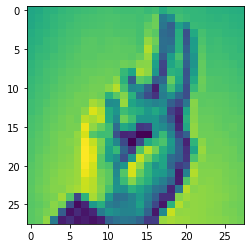

In [ ]:
other_index = 0
#print example R
for row in predicted_classes:
    #go through each prediction and sum up how many of each was wrong
    predicted_let = str(class_names[int(predicted_classes[other_index])])
    actual_let = str(class_names[int(testy[other_index][0])])
    if (actual_let == 'U'):
      print('A real U')
      print(other_index)
      plt.imshow(testx[other_index].reshape(28,28))
      break
    other_index+=1

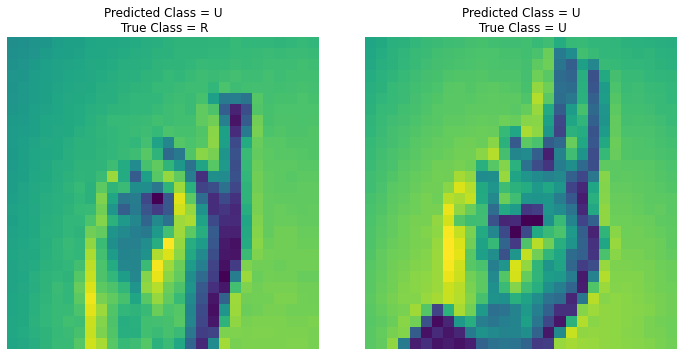

In [ ]:
L = 1
W = 2

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()


axes[0].imshow(testx[46].reshape(28,28))
axes[0].set_title("Predicted Class = " + str(class_names[int(predicted_classes[46])]) + "\n True Class = " + str(class_names[int(testy[46][0])]), color = 'black')
axes[0].axis('off')

axes[1].imshow(testx[50].reshape(28,28))
axes[1].set_title("Predicted Class = " + str(class_names[int(predicted_classes[50])]) + "\n True Class = " + str(class_names[int(testy[50][0])]), color = 'black')
axes[1].axis('off')
plt.subplots_adjust(wspace=0.15)

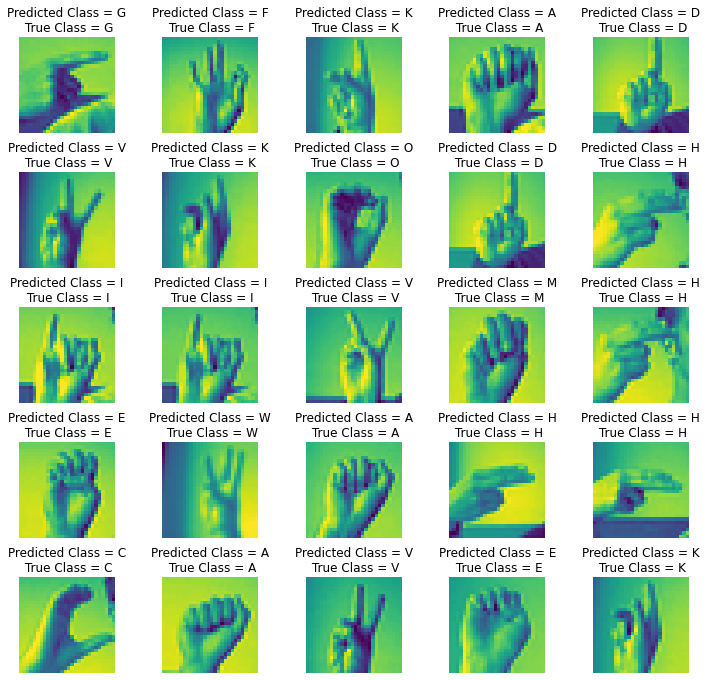

In [ ]:
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(testx[i].reshape(28,28))
    axes[i].set_title("Predicted Class = " + str(class_names[int(predicted_classes[i])]) + "\n True Class = " + str(class_names[int(testy[i][0])]), color = 'black')
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

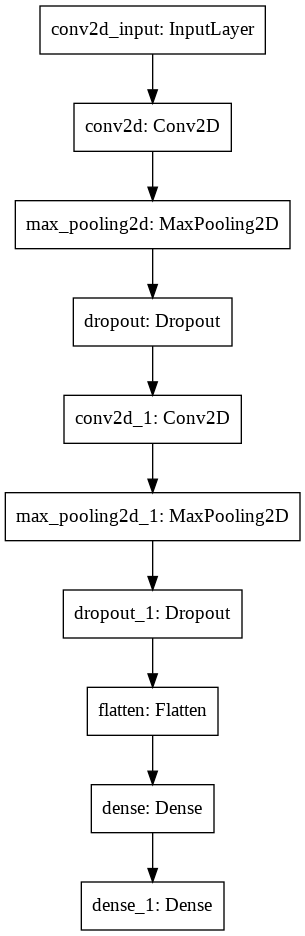

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(asl_model)

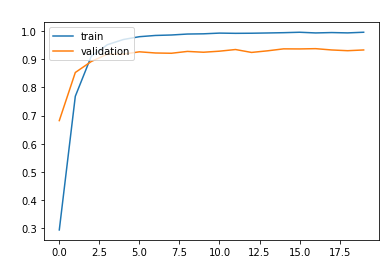

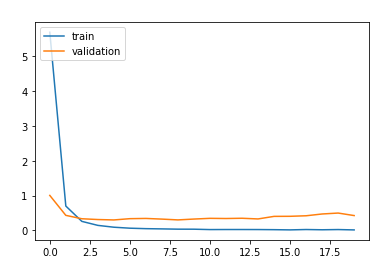

In [ ]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ASL Model Accuracy', color = 'white')
plt.ylabel('Accuracy', color = 'white')
plt.xlabel('Epoch', color = 'white')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ASL Model Loss', color = 'white')
plt.ylabel('Loss', color = 'white')
plt.xlabel('Epoch', color = 'white')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# II - VIDEO CLASSIFIER

# Imports

In [54]:
import pandas as pd
import numpy as np
import random
!pip install opencv-python
import matplotlib.pyplot as plt
import os

Defaulting to user installation because normal site-packages is not writeable


# Data

### Hand Shapes JSON File

In [85]:
#Reading in hand shape data
handshapes_df = pd.read_json('WLASL_handshapes.json', orient = 'records')

In [86]:
print(handshapes_df)#. ['handshape'][:50])# ['instances']) #~10-15 categories

           gloss                                          instances  \
0           book  [{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...   
1          drink  [{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...   
2       computer  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
3         before  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
4          chair  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
...          ...                                                ...   
1995  washington  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
1996   waterfall  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
1997       weigh  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
1998  wheelchair  [{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f...   
1999     whistle  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   

       handshape  
0     15,5-close  
1       5-claw,C  
2       5-claw,C  
3     15,5-close  
4         2-claw  
...          ...  
1995         N

In [90]:
handshapes_df.head()
#print(handshapes_df['instances'][0])
print(len(handshapes_df['instances'][0])) #many examples per word

40


In [91]:
handshapes_df = handshapes_df.fillna('None')

In [92]:
#expand it where each row is a video
expanded_handshape_df = pd.DataFrame()
word_list = []
video_id_list = []
bbox_list = []
frame_start_list = []
frame_end_list = []
split_list = []
handshape_list = []

for index, row in handshapes_df.iterrows(): #iterate over the rows of the dataframe
  #print(row['instances'])
  instance_list = row['instances']
  for idx in range(len(instance_list)): #iterate through each video instance
    video_dict = instance_list[idx]
    #print(video_dict)
    word_list.append(row['gloss'])
    video_id_list.append(video_dict['video_id'])
    bbox_list.append(video_dict['bbox'])
    frame_start_list.append(video_dict['frame_start'])
    frame_end_list.append(video_dict['frame_end'])
    split_list.append(video_dict['split'])
    handshape_list.append(row['handshape'])

    #if (video_dict['split'] == 'train'):
      #print('train')

#compare 10 random frames vs first 10
expanded_handshape_df['word'] = word_list
expanded_handshape_df['video_id'] = video_id_list
expanded_handshape_df['bbox'] = bbox_list
expanded_handshape_df['frame_start']= frame_start_list
expanded_handshape_df['frame_end'] = frame_end_list
expanded_handshape_df['split'] = split_list #split indicates whether its training, test, or eval
expanded_handshape_df['handshape'] = handshape_list #this is the label for the training sets
#all of these videos are 25 fps so there is no need to keep that in the dataframe
expanded_handshape_df.head()
#what to do with frame start and frame end????
#1-i; 2-claw; R; 3; 3-claw; 3-P,K; 4; 6; Y; 7,horn,ILY; 13; H,U; 14,B #stokoe handshpaes, most common handshapes


,word,video_id,bbox,frame_start,frame_end,split,handshape
0,book,69241,"[385, 37, 885, 720]",1,-1,train,"15,5-close"
1,book,65225,"[190, 25, 489, 370]",1,-1,train,"15,5-close"
2,book,68011,"[262, 1, 652, 480]",1,-1,train,"15,5-close"
3,book,68208,"[123, 19, 516, 358]",1,60,train,"15,5-close"
4,book,68012,"[95, 0, 1180, 720]",1,-1,train,"15,5-close"


In [93]:
len(expanded_handshape_df.index)

21083

In [94]:
expanded_handshape_df.handshape.unique()

array(['15,5-close', '5-claw,C', '2-claw', '1,D', '5', 'None', '13', 'S',
       '8,8-open', 'Y', '14,B', '9', '20,G,L', '1-X', '2', '0,0-flat',
       '1-i', '3-P,K', 'H,U', '3', '10,A', '6', 'R', '7,horn,ILY', '4',
       '3-claw'], dtype=object)

In [95]:
hs_red = expanded_handshape_df[(expanded_handshape_df.handshape != '1-i')&(expanded_handshape_df.handshape != '2-claw')&(expanded_handshape_df.handshape != 'R')&(expanded_handshape_df.handshape != '3')&(expanded_handshape_df.handshape != '3-claw')&(expanded_handshape_df.handshape != '3-P')&(expanded_handshape_df.handshape != 'K')&(expanded_handshape_df.handshape != '4')&(expanded_handshape_df.handshape != '6')&(expanded_handshape_df.handshape != 'Y')&(expanded_handshape_df.handshape != '7,horn,ILY')&(expanded_handshape_df.handshape != '13')&(expanded_handshape_df.handshape != 'H,U')&(expanded_handshape_df.handshape != '1-i')&(expanded_handshape_df.handshape != '14,B')]

In [96]:
hs_red.handshape.unique()

array(['15,5-close', '5-claw,C', '1,D', '5', 'None', 'S', '8,8-open', '9',
       '20,G,L', '1-X', '2', '0,0-flat', '3-P,K', '10,A'], dtype=object)

In [97]:
len(hs_red.index)

18890

In [98]:
print(hs_red['handshape'].value_counts())
print(type(hs_red['handshape'].value_counts()))

None          7473
15,5-close    2584
1,D           1745
5             1167
10,A           975
5-claw,C       932
S              779
9              639
1-X            583
0,0-flat       494
20,G,L         467
2              449
8,8-open       440
3-P,K          163
Name: handshape, dtype: int64
<class 'pandas.core.series.Series'>


In [99]:
freq_dict = hs_red['handshape'].value_counts().to_dict()
print(freq_dict)

{'None': 7473, '15,5-close': 2584, '1,D': 1745, '5': 1167, '10,A': 975, '5-claw,C': 932, 'S': 779, '9': 639, '1-X': 583, '0,0-flat': 494, '20,G,L': 467, '2': 449, '8,8-open': 440, '3-P,K': 163}


In [100]:
ws = []
for idx, row in hs_red.iterrows():
    hs = row['handshape']
    ws.append(1.0/float(freq_dict[hs]))
hs_sampled = hs_red.sample(n = 3500, weights=ws, random_state=1)
print(hs_sampled['handshape'].value_counts())

15,5-close    289
None          286
10,A          285
S             282
1,D           282
5-claw,C      272
5             254
8,8-open      244
1-X           243
9             243
0,0-flat      232
2             224
20,G,L        217
3-P,K         147
Name: handshape, dtype: int64


In [102]:
hs_final = hs_sampled.reset_index()
hs_final.head()

,index,word,video_id,bbox,frame_start,frame_end,split,handshape
0,7636,big,06192,"[0, 8, 318, 240]",1,-1,train,"20,G,L"
1,13951,count,13534,"[82, 18, 197, 192]",1,-1,train,9
2,4,book,68012,"[95, 0, 1180, 720]",1,-1,train,"15,5-close"
3,5677,voice,61913,"[0, 0, 360, 240]",806,878,train,2
4,2672,write,64049,"[0, 0, 360, 240]",4096,4172,test,"20,G,L"


### Video Files

In [17]:
#Accessing WLASL folder from your drive
!unzip -qq WLASL.zip


warning [WLASL.zip]:  4294967296 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  4294967296
  (attempting to re-compensate)
replace WLASL/start_kit/preprocess.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [103]:
import os

arr = os.listdir("./WLASL/start_kit/raw_videos")
print(arr[0])

54428.mp4


In [106]:

!pip install opencv-python
import cv2 as cv

#create the numpy array training set
final_frames_list = []
bad_video_counter = 0

for idx, row in hs_final.iterrows(): #each row now represents a video segment that corresponds to a particular word
    if (idx%500 == 0):
      print(idx)
    cap = cv.VideoCapture("./WLASL/start_kit/raw_videos/"+row['video_id']+".mp4")
    first_frame = row['frame_start']-1 #start at 0
    last_frame  = row['frame_end']-1
    frame_count = 0
    frame_list = []
    indices_to_keep = []
    while cap.isOpened():
        ret, frame = cap.read()
        # if frame is read correctly ret is True
        if not ret:
            #print("Can't receive frame (stream end?). Exiting ...")
            break
        if (last_frame > 0) and (current_frame > last_frame):
            #print("Reached end of segment of interest")
            break
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        #reshape the images (do I need to standard scale the image?)
        res_frame = cv.resize(frame, dsize=(256,256), interpolation= cv.INTER_CUBIC)
        #add the rezied frame to the list of frames
        frame_list.append(res_frame)
        #increment the frame
        frame_count = frame_count + 1
        #cv2_imshow(res_frame) #frame here is just a numpy array
        #mask off the boundary if needed (skip this for now)
        if cv.waitKey(1) == ord('q'):
            break

    #print(frame_count)
    #if it doesn't specify an end frame then its the current frame after looping through them all
    if last_frame < 0:
      end_frame = frame_count-1
    else:
      end_frame = last_frame

    if frame_count == 0:
      #bail and remove from the dataframe row
      #print('Empty or non-existent video')
      hs_final = hs_final.drop(idx, axis=0)
      bad_video_counter += 1
    else:
      #I am going to do 15 frames evenly spaced out over the range of interest 
      indices_to_keep = np.linspace(first_frame, end_frame, 9) #pick 9 so it can be square

      #this gives a list with dimensions (number of examples) x 15 x 256 x 256 x 3
      #15 is because i use 15 frames from each video for each instance, and each image is 256 x 256 x 3
      final_frames_to_add = [frame_list[int(i)] for i in indices_to_keep]

      final_frames_list.append(final_frames_to_add) #this should give a list with dimensions (number of examples) x 15 x 256 x 256 x 3
      cap.release()
      cv.destroyAllWindows()

final_frames_arr = np.array(final_frames_list)
print('final frames array shape'+ str(final_frames_arr.shape))
print('Bad Video Count: '+str(bad_video_counter))

Defaulting to user installation because normal site-packages is not writeable
0
500
1000
1500
2000
2500
3000
final frames array shape(1986, 9, 256, 256, 3)
Bad Video Count: 1514


In [14]:
final_frames_arr.shape

(11539, 9, 256, 256, 3)

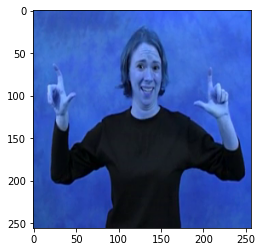

In [109]:
plt.imshow(final_frames_arr[0][5])

In [111]:
import pickle as pkl
with open( "ASL_FINAL_data.p", "wb" ) as data_out:
  pkl.dump(final_frames_arr, data_out, protocol = 4)

Get the labels

In [130]:
from sklearn.preprocessing import OneHotEncoder

labels = hs_final[['handshape']]

#label = labels_df[["page_type"]]

cat_encoder = OneHotEncoder()
label_1hot = cat_encoder.fit_transform(labels)
label_1hot.toarray()

#it works! label_1hot is what you want to use

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
labels = np.array(label_1hot.todense())

In [132]:
labels.shape

(1986, 14)

In [134]:
labels[25:35]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [119]:
with open( "ASL_FINAL_labels.p", "wb" ) as data_out:
  pkl.dump(labels, data_out, protocol = 4)

In [135]:
labeled_signs = hs_final[['handshape']]
print(labeled_signs[25:35])

   handshape
46         2
47      10,A
52         5
53  0,0-flat
57       1,D
58     3-P,K
62         S
63    20,G,L
64    20,G,L
65         5


In [ ]:
#[0,0-flat ; 1,D ; 1-X ; 10,A ; 15,15-close ; 2 ; 20,G,L ; 3-P,K ; 5 ; 5-claw,C ; 8,8-open ; 9 ; None ; S]

# Model Training

In [ ]:
model = keras.Sequential([
    keras.layers.TimeDistributed(Conv2D(3, 1, strides = (1,1), activation='relu', input_shape=(height, width,3))),
    keras.layers.TimeDistributed(Conv2D(3, 1, strides = (1,1), activation='relu')),
    keras.layers.TimeDistributed(Flatten()),
    keras.layers.LSTM(256, return_sequences=True),
    keras.layers.LSTM(256, return_sequences = True),
    #keras.layers.Dense(128, activation='relu', activity_regularizer=l1(0.0001)),
    keras.layers.Dense(2, activation = 'relu')
])

my_callbacks = [(tf.keras.callbacks.EarlyStopping( monitor='mean_squared_error', min_delta = 0.00001, patience=20))]

for i in range(4):
  lr = pow(1/10, (i+3)) #
  #print(lr)
  model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr), metrics = [tf.keras.metrics.MeanSquaredError()])
  model.fit(train_images, train_labels, epochs=100, batch_size=16, validation_data=(val_images, val_labels), callbacks = my_callbacks, verbose=1, shuffle=False)
  print("Model ", i+1, "Results with LR ", lr)
  results = model.evaluate(val_images, val_labels, batch_size=16)
  print("test loss, test acc:", results)

results = model.predict(val_images)

print(model.summary())

# Predictions